In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = ['IPAexMincho']

In [3]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

X = tf.placeholder("float") # create symbolic variables
Y = tf.placeholder("float")

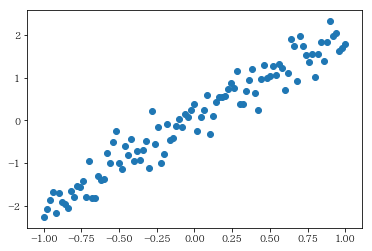

In [4]:
plt.scatter(trX, trY)

In [5]:
def model(X, w):
    return tf.multiply(X, w) # lr is just X*w so this model line is pretty simple


In [6]:
w = tf.Variable(0.0, name="weights") # create a shared variable (like theano.shared) for the weight matrix
y_model = model(X, w)

In [7]:
cost = tf.square(Y - y_model) # use square error for cost function
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # construct an optimizer to minimize cost and fit line to my data


In [8]:
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for i in range(100):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})

    print(sess.run(w))  # It should be something around

2.0284934
